### Problems Statements:

#### Extract reviews of any product from ecommerce websites like amazon

#### Perform emotion mining

In [1]:
#Import liabries
import re
import nltk
import spacy
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

### Let's review Boat SmartWatch opinion

In [2]:
#Extracting data
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

In [3]:
#Looping through multiple pages
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [4]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [5]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/product-reviews/B0B574QXFL/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

#### Save result to dataframe, then export as CSV

In [6]:
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,Good build quality & display. But not very smart.,3.0,Skipping the parts mostly covered in other rev...,Reviewed in India on 9 August 2022
1,Ita is an ok product....better to buy a good f...,3.0,The media could not be loaded.\n ...,Reviewed in India on 17 October 2022
2,Worth the price!,4.0,The media could not be loaded.\n ...,Reviewed in India on 26 August 2022
3,It's a good product,4.0,Call quality is nice ☺️Display is assume....,Reviewed in India on 26 March 2023
4,Good but mobile connection not long time,4.0,Ok,Reviewed in India on 26 March 2023
...,...,...,...,...
1595,Worth every penny,5.0,One of the best watch used so far. I liked thi...,Reviewed in India on 22 November 2022
1596,Worth for the price,5.0,The watch is fantastic and the price makes it ...,Reviewed in India on 8 November 2022
1597,Must buy..,5.0,"Stylish, practical, functional and affordable",Reviewed in India on 8 November 2022
1598,Great,5.0,My son loves this thing!! It is super easy to ...,Reviewed in India on 20 November 2022


In [7]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)
df.head(50)

,Title,Rating,Review,Review_Date
0,Good build quality & display. But not very smart.,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
1,Ita is an ok product....better to buy a good f...,3.0,The media could not be loaded.\n ...,17 October 2022
2,Worth the price!,4.0,The media could not be loaded.\n ...,26 August 2022
3,It's a good product,4.0,Call quality is nice ☺️Display is assume....,26 March 2023
4,Good but mobile connection not long time,4.0,Ok,26 March 2023
5,Good,4.0,Good but some time,20 March 2023
6,Watch Faces,4.0,Very Nice Product overall!Should have more spa...,11 March 2023
7,Silent mode or volume control feature not avai...,3.0,Not sure why there is no volume feature in wat...,22 March 2023
8,Good,4.0,Good,16 March 2023
9,Overall ... product is nice you can buy this,4.0,Gud,10 March 2023


In [8]:
df.to_csv("BoatSmartWatch_Review.csv")

#### Load Dataset

In [9]:
reviews = pd.read_csv('BoatSmartWatch_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Title,Rating,Review,Review_Date
0,Good build quality & display. But not very smart.,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
1,Ita is an ok product....better to buy a good f...,3.0,The media could not be loaded.\n ...,17 October 2022
2,Worth the price!,4.0,The media could not be loaded.\n ...,26 August 2022
3,It's a good product,4.0,Call quality is nice ☺️Display is assume....,26 March 2023
4,Good but mobile connection not long time,4.0,Ok,26 March 2023
...,...,...,...,...
1595,Worth every penny,5.0,One of the best watch used so far. I liked thi...,22 November 2022
1596,Worth for the price,5.0,The watch is fantastic and the price makes it ...,8 November 2022
1597,Must buy..,5.0,"Stylish, practical, functional and affordable",8 November 2022
1598,Great,5.0,My son loves this thing!! It is super easy to ...,20 November 2022


### Data Exploriation

In [10]:
reviews.Rating.describe()

count    1600.000000
mean        3.458125
std         1.717219
min         1.000000
25%         1.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [11]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        1600 non-null   object 
 1   Rating       1600 non-null   float64
 2   Review       1553 non-null   object 
 3   Review_Date  1600 non-null   object 
dtypes: float64(1), object(3)
memory usage: 50.1+ KB


In [12]:
reviews.isna().sum()

Title           0
Rating          0
Review         47
Review_Date     0
dtype: int64

In [13]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

,Title,Rating,Review,Review_Date
0,Good build quality & display. But not very smart.,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
1,Ita is an ok product....better to buy a good f...,3.0,The media could not be loaded.\n ...,17 October 2022
2,Worth the price!,4.0,The media could not be loaded.\n ...,26 August 2022
3,It's a good product,4.0,Call quality is nice ☺️Display is assume....,26 March 2023
4,Good but mobile connection not long time,4.0,Ok,26 March 2023


### Data Visulaization

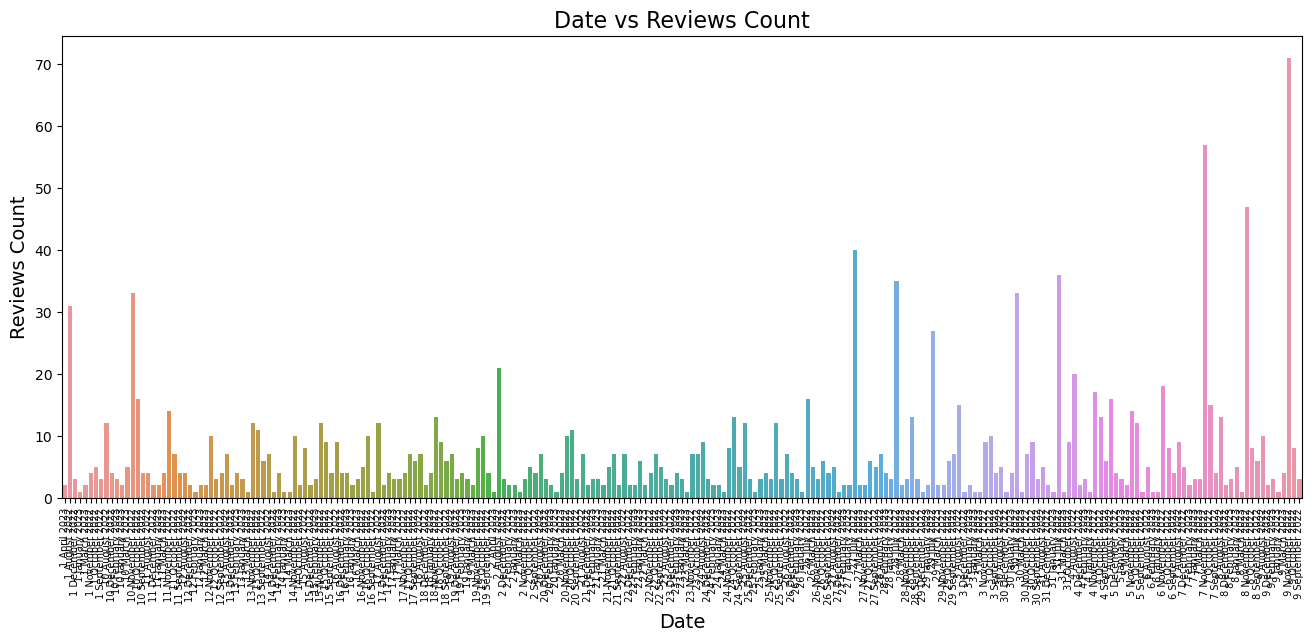

In [14]:
#Date vs Review Count
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

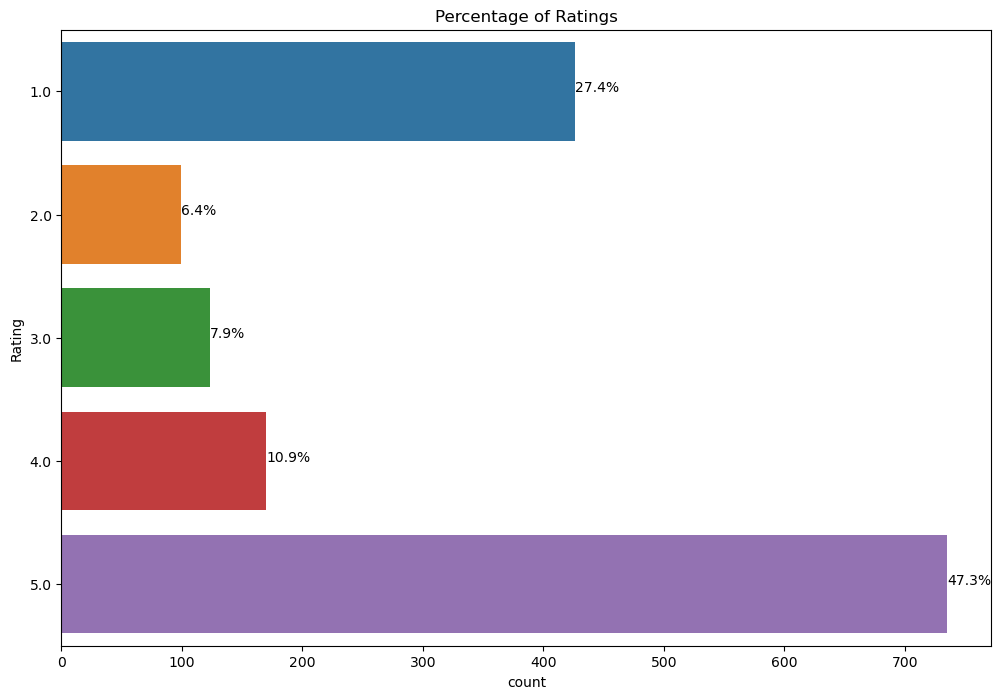

In [15]:
#Percentage of Rating
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

The rating of 5 out of 5 is higher than other.

### Basic Text processing for Sentiment Analysis

#### Spelling Correction

In [18]:
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    Shipping the parts mostly covered in other rev...
1    The media could not be loaded.\n              ...
2    The media could not be loaded.\n              ...
3          All quality is nice ☺️Display is assume....
4                                                    K
Name: Review, dtype: object

In [19]:
boat_review = reviews[['Review']]
boat_review

,Review
0,Skipping the parts mostly covered in other rev...
1,The media could not be loaded.\n ...
2,The media could not be loaded.\n ...
3,Call quality is nice ☺️Display is assume....
4,Ok
...,...
1595,One of the best watch used so far. I liked thi...
1596,The watch is fantastic and the price makes it ...
1597,"Stylish, practical, functional and affordable"
1598,My son loves this thing!! It is super easy to ...


#### Resetting Index

In [20]:
boat_review.reset_index(drop=True, inplace=True)

In [21]:
stop_words = stopwords.words('english')
boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))

#### Lemmatizer

In [22]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(boat_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", boat_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/1553 [00:00<?, ?it/s]

In [23]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": boat_review.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
1,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan..."
2,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...
3,call quality nice display assume,call quality nice ☺️display assume....
4,ok,ok


### Text pre-processing Techniques

#### Removing '@names'

In [24]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [25]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
1,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan..."
2,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...
3,call quality nice display assume,call quality nice ☺️display assume....
4,ok,ok
5,good time,good time
6,nice product overall space store watch face wa...,very nice product overall!should space store w...
7,sure volume feature watch option carrying watc...,not sure volume feature watch. only option car...
8,good,good
9,gud,gud


#### Removing links(http|https)

In [26]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
1,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan..."
2,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...
3,call quality nice display assume,call quality nice ☺️display assume....
4,ok,ok
5,good time,good time
6,nice product overall space store watch face wa...,very nice product overall!should space store w...
7,sure volume feature watch option carrying watc...,not sure volume feature watch. only option car...
8,good,good
9,gud,gud


#### Removing review with empty text

In [27]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
1,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan..."
2,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...
3,call quality nice display assume,call quality nice ☺️display assume....
4,ok,ok
5,good time,good time
6,nice product overall space store watch face wa...,very nice product overall!should space store w...
7,sure volume feature watch option carrying watc...,not sure volume feature watch. only option car...
8,good,good
9,gud,gud


#### Dropping duplicate rows

In [28]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
1,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan..."
2,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...
3,call quality nice display assume,call quality nice ☺️display assume....
4,ok,ok
5,good time,good time
6,nice product overall space store watch face wa...,very nice product overall!should space store w...
7,sure volume feature watch option carrying watc...,not sure volume feature watch. only option car...
8,good,good
9,gud,gud


#### Function to remove emoji

In [29]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [30]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
1,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan..."
2,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...
3,call quality nice display assume,call quality nice ☺️display assume....
4,ok,ok
5,good time,good time
6,nice product overall space store watch face wa...,very nice product overall!should space store w...
7,sure volume feature watch option carrying watc...,not sure volume feature watch. only option car...
8,good,good
9,gud,gud


#### Removing Stop Words

In [31]:
with codecs.open(r"E:\DS Assigment\Text Mining/stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [32]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [33]:
my_stop_words = stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
1,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan..."
2,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...
3,call quality nice display assume,call quality nice ☺️display assume....
4,ok,ok
5,good time,good time
6,nice product overall space store watch face wa...,very nice product overall!should space store w...
7,sure volume feature watch option carrying watc...,not sure volume feature watch. only option car...
8,good,good
9,gud,gud


#### Tokenize 'Clean_Reviews'

In [34]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['medium', 'could', 'loaded', 'hello', 'good', 'day', 'fan', 'boat', 'device', 'recently', 'purchased', 'smart', 'watch', 'brand', 'thought', 'put', 'feedback', 'improved', 'possible', 'via', 'software', 'update', 'volume', 'able', 'increase', 'decrease', 'call', 'notification', 'smart', 'watch', 'unable', 'find', 'setting', 'either', 'watch', 'appfind', 'phone', 'option', 'find', 'watch', 'app', 'use', 'gon', 'na', 'vibrate', 'instead', 'using', 'speaker', 'better', 'locating', 'watch', 'rotating', 'dial', 'dial', 'watch', 'rotates', 'right', 'purpose', 'rotating', 'scrolling', 'option', 'button', 'would', 'better', 'optionnotification', 'adding', 'app', 'option', 'notification', 'section', 'available', 'apps', 'using', 'call', 'display', 'option', 'call', 'call', 'display', 'always', 'displaying', 'whomever', 'ever', 'im', 'speaking', 'phone', 'getting', 'notification', 'watch', 'fine', 'second', 'display', 'continuously', 'nearly', 'minute', 'call', 'want', 'watch', 'batter

In [35]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [skipping, part, mostly, covered, review, spon...
1    [medium, could, loaded, hello, good, day, fan,...
2    [medium, could, loaded, got, watch, today, che...
3               [call, quality, nice, display, assume]
4                                                 [ok]
5                                         [good, time]
6    [nice, product, overall, space, store, watch, ...
7    [sure, volume, feature, watch, option, carryin...
8                                               [good]
9                                                [gud]
Name: Clean_Reviews, dtype: object

In [36]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon..."
1,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan...","[medium, could, loaded, hello, good, day, fan,..."
2,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...,"[medium, could, loaded, got, watch, today, che..."
3,call quality nice display assume,call quality nice ☺️display assume....,"[call, quality, nice, display, assume]"
4,ok,ok,[ok]
5,good time,good time,"[good, time]"
6,nice product overall space store watch face wa...,very nice product overall!should space store w...,"[nice, product, overall, space, store, watch, ..."
7,sure volume feature watch option carrying watc...,not sure volume feature watch. only option car...,"[sure, volume, feature, watch, option, carryin..."
8,good,good,[good]
9,gud,gud,[gud]


#### Converting words to Stemmer

In [37]:
stemmer = SnowballStemmer("english")

In [38]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,skip part most cover review sponsor yt one add...
1,medium could load hello good day fan boat devi...
2,medium could load got watch today check featur...
3,call qualiti nice display assum
4,ok
...,...
1548,one best watch use far like metal strap qualit...
1549,watch fantast price make worth thank much
1550,stylish practic function afford
1551,son love thing super easi use look great think...


#### Converting words to Lemma

In [39]:
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

,stemmed
0,skipping part mostly covered review sponsored ...
1,medium could loaded hello good day fan boat de...
2,medium could loaded got watch today checked fe...
3,call quality nice display assume
4,ok
...,...
1548,one best watch used far liked metal strap qual...
1549,watch fantastic price make worth thank much
1550,stylish practical functional affordable
1551,son love thing super easy use look great think...


### Basic Feature Extraction

#### Applying bag of words without N grams

In [40]:
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [41]:
print(cv.get_feature_names()[109:200])

['amoledsize', 'among', 'amount', 'ample', 'analog', 'analogue', 'analysis', 'ancconsweather', 'andit', 'andlooks', 'andnot', 'android', 'angle', 'animation', 'announced', 'annoying', 'annoyingdo', 'another', 'answer', 'answered', 'answering', 'anymore', 'anyone', 'anything', 'anythingdoes', 'anytime', 'anywhere', 'aod', 'aodhere', 'aomled', 'apart', 'apde', 'apke', 'apne', 'apo', 'app', 'appario', 'appbattery', 'appealing', 'appearance', 'appears', 'appfind', 'apple', 'application', 'applied', 'appoverall', 'appreciable', 'appreciate', 'appreciated', 'appreciatedin', 'apprehensive', 'approach', 'appropriate', 'approx', 'apps', 'apt', 'apx', 'archa', 'area', 'arm', 'around', 'arranged', 'arrive', 'arrived', 'arrives', 'arriving', 'art', 'asap', 'aside', 'ask', 'asked', 'asking', 'asks', 'asle', 'asleep', 'aspect', 'assist', 'assistance', 'assistant', 'assitance', 'assume', 'assured', 'atleast', 'atmosphere', 'atractivelong', 'attach', 'attached', 'attempted', 'attend', 'attended', 'att

In [42]:
print(cv.get_feature_names()[:100])

['aa', 'aacha', 'aap', 'aaya', 'aayga', 'abd', 'ability', 'able', 'abruptly', 'absolute', 'absolutely', 'accept', 'accepted', 'accepting', 'acceptweather', 'access', 'accessory', 'accha', 'according', 'account', 'accray', 'accuracy', 'accuracyno', 'accurate', 'accurately', 'accurateonly', 'accurateslightly', 'acha', 'achanak', 'ache', 'achha', 'achi', 'achii', 'acorate', 'acreoosss', 'act', 'action', 'activate', 'activated', 'activating', 'active', 'activites', 'activity', 'actual', 'actually', 'acurate', 'adapter', 'adaptor', 'add', 'added', 'adding', 'addition', 'additional', 'additionally', 'addressed', 'adequate', 'adhere', 'adjust', 'adjusted', 'adjustment', 'advance', 'advanced', 'advertised', 'advertisement', 'advertising', 'advertized', 'afford', 'affordable', 'afternoon', 'afterwards', 'agar', 'agent', 'aggregate', 'ago', 'agreed', 'ahead', 'airdopes', 'alag', 'alarm', 'alert', 'alexa', 'aligned', 'alla', 'allergy', 'allow', 'allowed', 'allows', 'almost', 'alone', 'along', 'al

In [43]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


#### CountVectorizer with N-grams(Bigrams & Trigrams)

In [44]:
dataframe = dataframe.reset_index(drop=True)

In [45]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/1544 [00:00<?, ?it/s]

In [46]:
corpus[3]

'call qualiti nice display assum'

#### Applying Countvectorizer

In [47]:
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()
X.shape

(1544, 1546)

In [48]:
cv.get_feature_names()[:20]

['abl',
 'absolut',
 'accept',
 'access',
 'accord',
 'accur',
 'accuraci',
 'activ',
 'activ like',
 'activ mode',
 'activ track',
 'actual',
 'ad',
 'add',
 'addit',
 'afford',
 'alarm',
 'alert',
 'alexa',
 'allow']

In [49]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [50]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names())
count_df

,abl,absolut,accept,access,accord,accur,accuraci,activ,activ like,activ mode,...,write,write review,wrong,xtend,xtend pro,xtend pro watch,ye,year,yet,youtub
0,0,0,1,1,0,0,1,6,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1540,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1541,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1542,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### TF-IDF Vactorizer

In [51]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/1544 [00:00<?, ?it/s]

In [52]:
corpus[4]

'ok'

#### Applying TF-IDF Vectorizer

In [53]:
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()
X.shape

(1544, 1546)

In [54]:
tfidf_v.get_feature_names()[:20]

['abl',
 'absolut',
 'accept',
 'access',
 'accord',
 'accur',
 'accuraci',
 'activ',
 'activ like',
 'activ mode',
 'activ track',
 'actual',
 'ad',
 'add',
 'addit',
 'afford',
 'alarm',
 'alert',
 'alexa',
 'allow']

In [55]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [56]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names())
count_df

,abl,absolut,accept,access,accord,accur,accuraci,activ,activ like,activ mode,...,write,write review,wrong,xtend,xtend pro,xtend pro watch,ye,year,yet,youtub
0,0.000000,0.0,0.034799,0.038001,0.000000,0.00000,0.026563,0.152026,0.038916,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.039714,0.0,0.000000,0.000000,0.043735,0.00000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.000000,0.000000,0.000000,0.03889,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1540,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1541,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1542,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### D Named Entity Recognition(NER)

In [57]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'skipping part mostly covered review sponsored yt one add irritant common sense disappointment noticed since last day actual usage smart watch aod show date day week show hour min way configure beyond analog digital view also get turned start exercise activity like walking screen go dark go walk calory count home screen anywhere else show step count calorie aggregate calorie burnt exercise activity e step cals cycling show home screen separate two entry app smart enough addition quick way go start activity exercise first press side button twice select activites list menu versus swipe home screen go utterly useless cricket score screen instead many even use customisation menu option functionality mapping provided touch wake display available screen available rupee yr old huwai band one press side button every time see home screen utterly inconvenient reach day night time auto configuration aod twist wake provided making irritating sleep hour kept thus daily two time day task enable disa

#### Parts of Speech(POS) Tagging

In [58]:
nlp = spacy.load('en_core_web_sm')

one_block = reviews_text[0:2000]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [59]:
for token in doc_block[:50]:
    print(token,token.pos_)

skipping VERB
part NOUN
mostly ADV
covered VERB
review NOUN
sponsored VERB
yt PROPN
one NOUN
add VERB
irritant ADJ
common ADJ
sense NOUN
disappointment NOUN
noticed VERB
since SCONJ
last ADJ
day NOUN
actual ADJ
usage NOUN
smart ADJ
watch NOUN
aod PROPN
show NOUN
date NOUN
day NOUN
week NOUN
show NOUN
hour NOUN
min NOUN
way NOUN
configure NOUN
beyond ADP
analog NOUN
digital ADJ
view NOUN
also ADV
get AUX
turned VERB
start ADJ
exercise NOUN
activity NOUN
like ADP
walking VERB
screen NOUN
go VERB
dark ADJ
go VERB
walk VERB
calory NOUN
count VERB


#### Filtering the nouns and verbs only

In [60]:
nlp.max_length =  1222000
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['sleep', 'hour', 'kept', 'time', 'day', 'task', 'enable', 'feature', 'freaking', 'day', 'note', 'indication', 'started', 'exercise', 'activity', 'start', 'walking', 'come', 'hour', 'discover', 'forgot', 'turn', 'press', 'side', 'button', 'activate', 'watch', 'face', 'screen', 'detect', 'min', 'power', 'nap', 'day', 'time', 'add', 'hr', 'sleep', 'tally', 'count', 'night', 'time', 'sleep', 'hour', 'accuracy', 'said', 'math', 'charging', 'calling', 'battery', 'drain', 'day', 'charger', 'side', 'e', 'get', 'disengaged', 'twist', 'tension', 'charging', 'cable', 'activating', 'weather', 'cricket', 'score', 'feature', 'user', 'accept', 'rd', 'party', 'boat', 'data', 'privacy', 'end', 'user', 'data', 'usage', 'policy', 'enabling', 'contact', 'call', 'log', 'access', 'app', 'none', 'feature', 'work', 'given', 'intended', 'usage', 'feb', 'firmware', 'update', 'sync', 'data', 'turned', 'connect', 'watch', 'remove', 'watch']


#### Counting the noun & verb tokens

In [61]:
cv = CountVectorizer()
X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)

words_freq = [(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

,word,count
0,watch,1196
1,product,464
2,feature,430
3,battery,362
4,calling,306
5,display,304
6,quality,272
7,day,260
8,boat,239
9,working,222


#### Visualizing results(Barchart for top 10nouns + verbs)

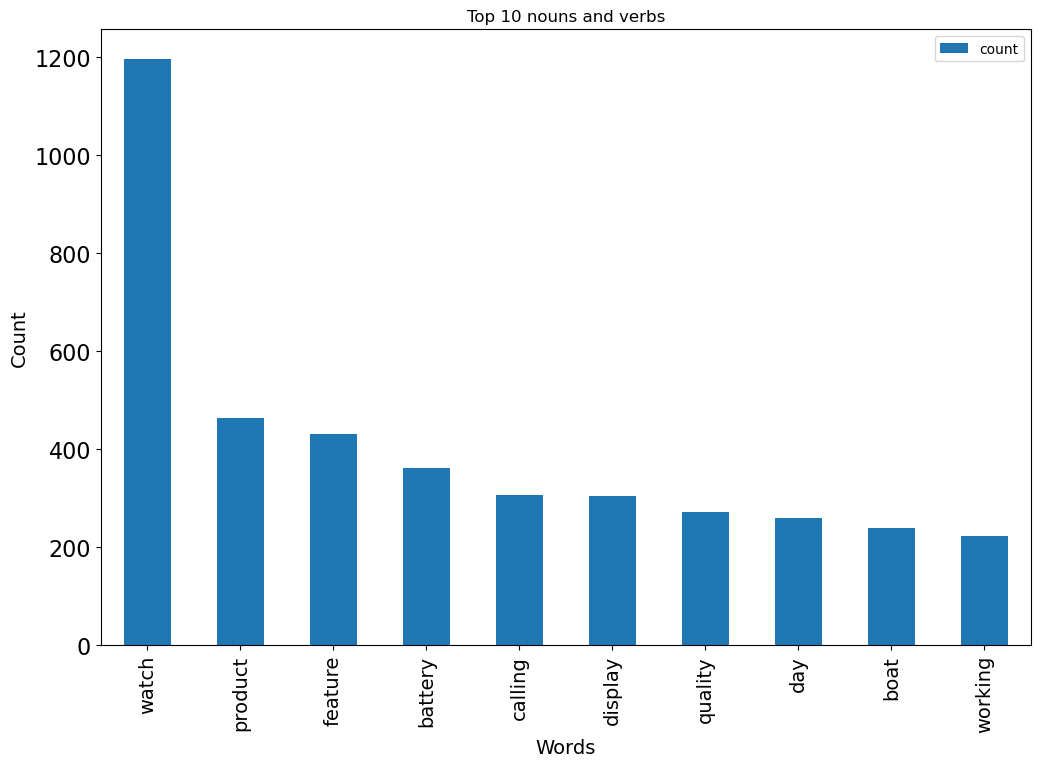

In [62]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs', fontsize=16)
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

### Fetch Sentiments Using TextBlob

In [63]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [64]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda reviews_text: fetch_sentiment_using_textblob(reviews_text))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,1318
neg,226


### Let's calculate subjectivity and Polarity

In [65]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon...",0.441033,-0.001266
1,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan...","[medium, could, loaded, hello, good, day, fan,...",0.453527,0.232312
2,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...,"[medium, could, loaded, got, watch, today, che...",0.472312,0.316325
3,call quality nice display assume,call quality nice ☺️display assume....,"[call, quality, nice, display, assume]",1.000000,0.600000
4,ok,ok,[ok],0.500000,0.500000


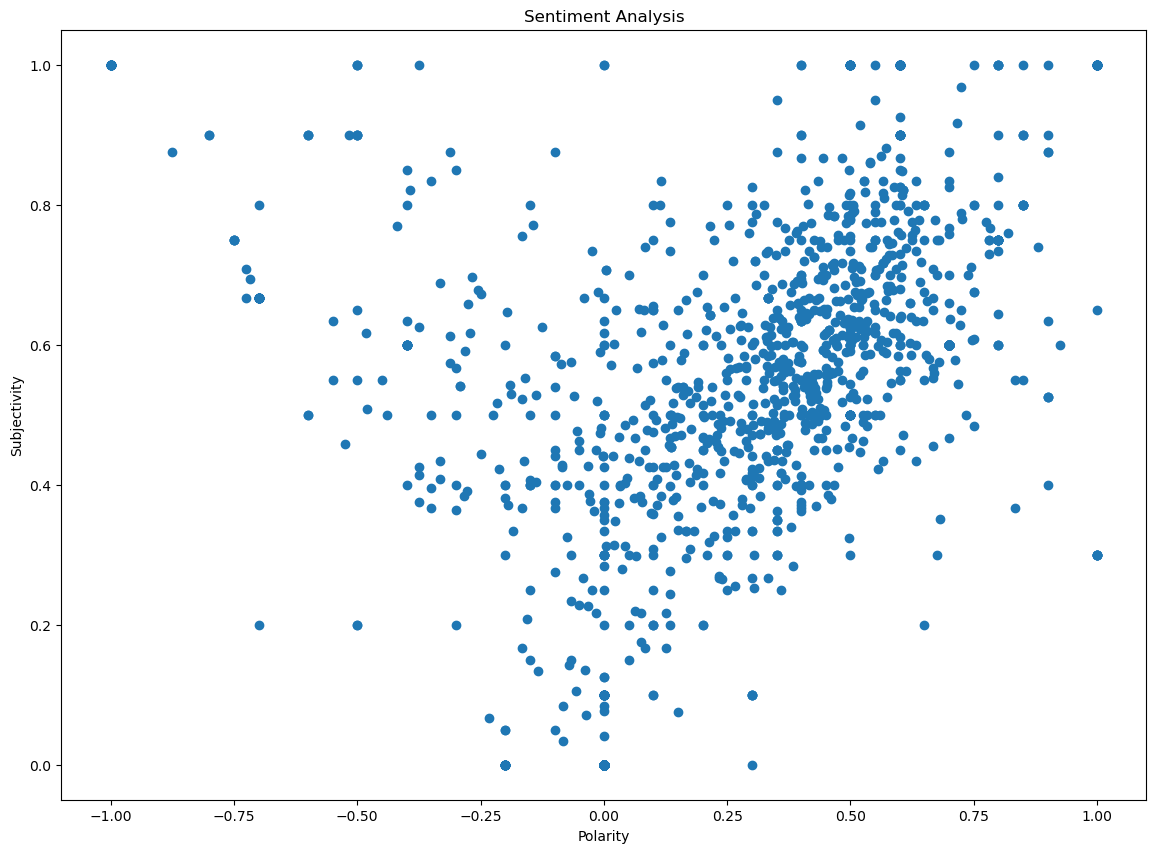

In [66]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

In [67]:
dataframe['sentiment'] = sentiments_using_textblob
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity,sentiment
0,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon...",0.441033,-0.001266,neg
1,medium could loaded hello good day fan boat de...,"the media could loaded. hello good day,i'm fan...","[medium, could, loaded, hello, good, day, fan,...",0.453527,0.232312,pos
2,medium could loaded got watch today checked fe...,the media could loaded. got watch today checke...,"[medium, could, loaded, got, watch, today, che...",0.472312,0.316325,pos
3,call quality nice display assume,call quality nice ☺️display assume....,"[call, quality, nice, display, assume]",1.000000,0.600000,pos
4,ok,ok,[ok],0.500000,0.500000,pos


### Story Generation & Visualization

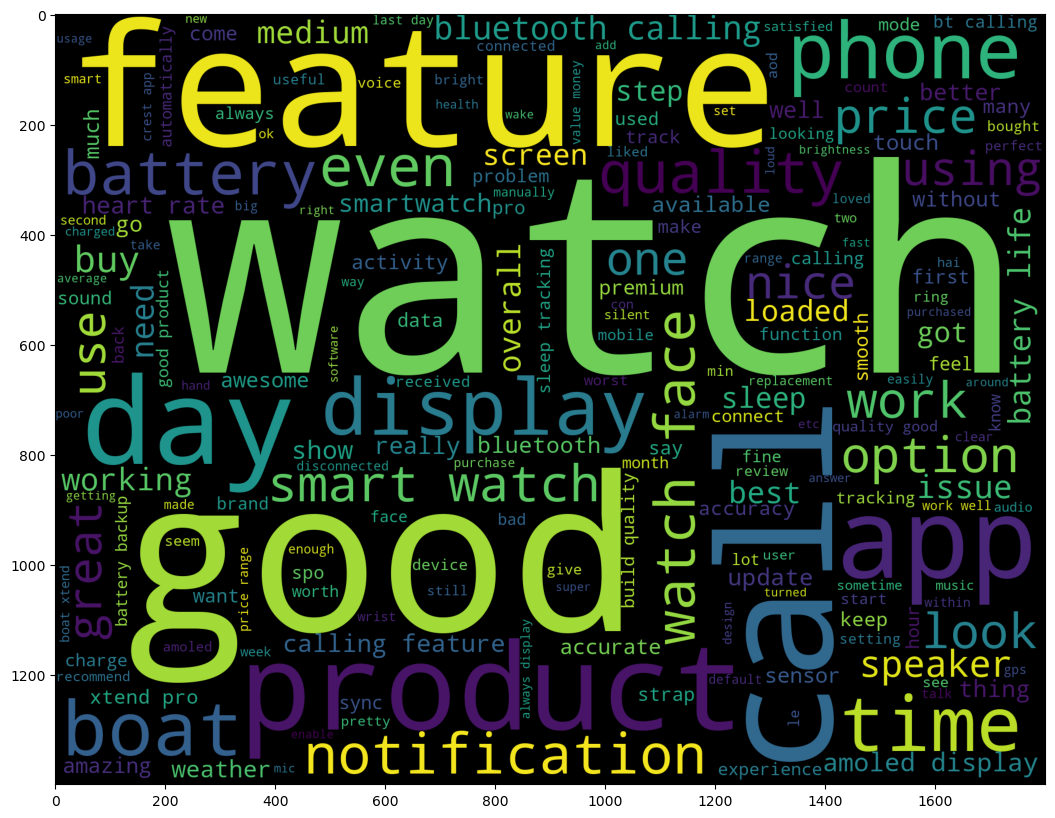

In [68]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

### Most common words in positive Review

In [69]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

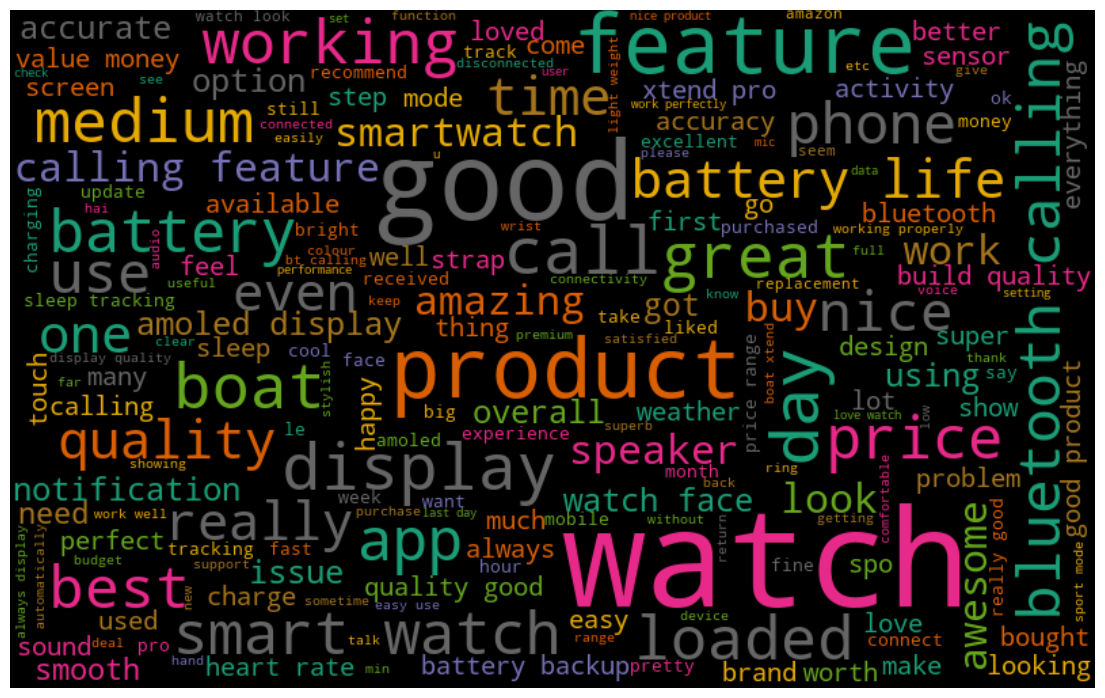

In [70]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'pos']])
generate_wordcloud(all_words)

### Most common words in negative Review

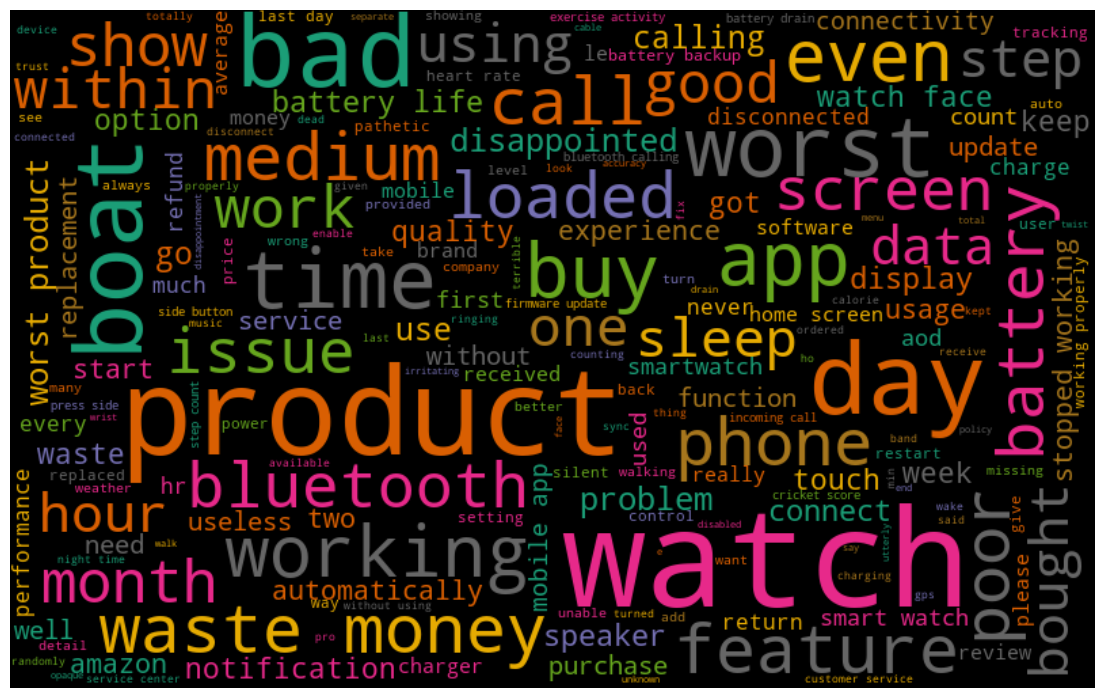

In [71]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)

### Conclusion:

#### In the above segment we can see all the mostly used words in  clean, positive and negative review.